**Credit card customer segmentation by clustering**

Dataset contains the usage behavior of around 9000 credit card users for the last six months. It is required to group credit card customers into several groups according to customer behavior.

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive (4).zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.shape

(8950, 18)

There are 8950 rows & 18 columns of the given dataset

**CUST_ID**: Unique identifier for each customer.

**BALANCE**: The current balance amount in the account.

**BALANCE_FREQUENCY**: Frequency of updating the balance.

**PURCHASES**: Total amount of purchases made.

**ONEOFF_PURCHASES**: Amount of purchases made in one go.

**INSTALLMENTS_PURCHASES**: Amount of purchases made in installments.

**CASH_ADVANCE**: Cash advances taken from the account.

**PURCHASES_FREQUENCY**: Frequency of purchases.

**ONEOFF_PURCHASES_FREQUENCY**: Frequency of one-off purchases.

**PURCHASES_INSTALLMENTS_FREQUENCY**: Frequency of installment purchases.
**CASH_ADVANCE_FREQUENCY**: Frequency of cash advances.

**CASH_ADVANCE_TRX**: Number of transactions involving cash advances.

**PURCHASES_TRX**: Number of purchase transactions made.

**CREDIT_LIMIT**: Limit of credit on the account.

**PAYMENTS**: Total payments done by the customer.

**MINIMUM_PAYMENTS**: Minimum payments due from the customer.

**PRC_FULL_PAYMENT**: Percentage of the full payment paid by the customer.
**TENURE**: Duration of account tenure with the bank.

In [ ]:
# Checking missing values exist or not
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

missing values in CREDIT_LIMIT (1 missing value) and MINIMUM_PAYMENTS (313 missing values).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Here we see that except Cutomer_id all are numerical columns

In [ ]:
df.duplicated().sum()

0

there are no duplicate rows in the given dataset

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


50%: This is the median
Here, We observed that mean is significantly higher than median for most of the columns.

So, Here most columns are highly right-skewed.

Most columns have a massive number of 0 values as because 25%(first quartile) of the data of max columns  are zero. Also, some columns median (50%) value is also zero.

In [ ]:
df = df.drop('CUST_ID', axis =1)
# Removing the Customer_Id column


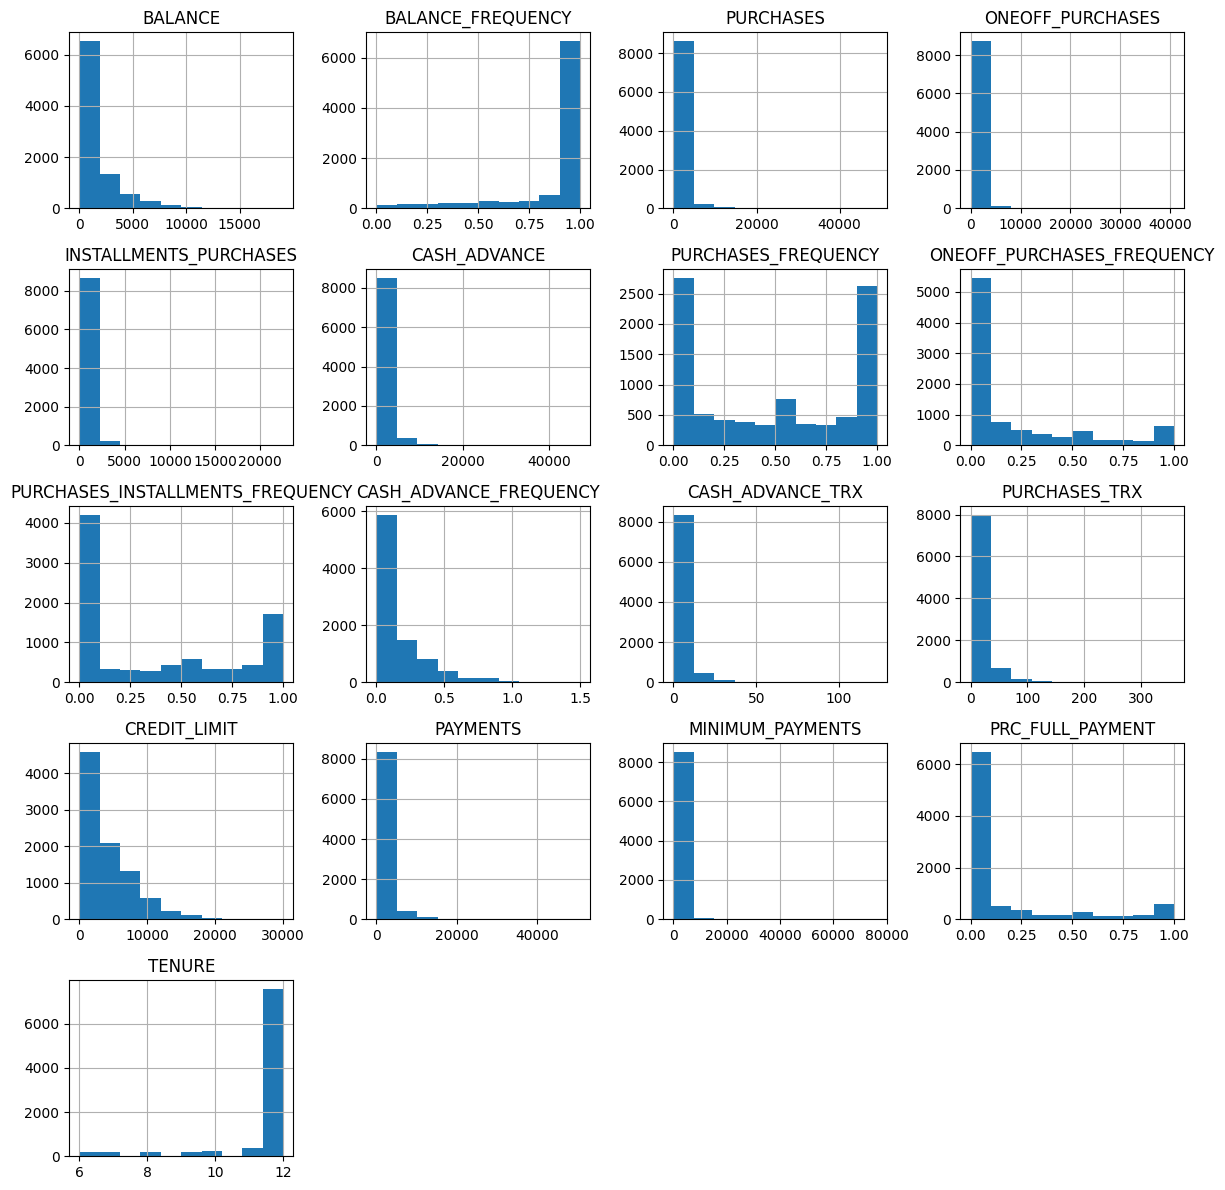

In [ ]:
# Histogram of all columns
df.hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

1.From histogram of all columns We see that Most columns have a massive number of 0 values , highly right skewed.

2.From BALANCE column , we see that there are many credit cards with 0 balances &  so many 0 purchase amounts in PURCHASE column.

3.Most of credit card accounts have 1 score in BALANCE_FREQUENCY column. However, this is different from ONEOFF_PURCHASES and PURCHASES_INSTALLMENT_FREQUENCY

4.Here, we see that most credit card customers prefer 12 months tenure compared to other tenure options.



**Conclusion**

From above point 2 it can be assumed that some users are intentionally keeping the balance low in their account in order to get high credit limit, which affects to increase credit utilization ratio and the credit score.

observation 3  indicates that most customers use credit card frequently where the majority of customers do not use credit cards for one-time transactions or payments in installments.

From 4 it can be concluded that customers are more likely to repay credits in the long term with the consequence of a higher interest rate.

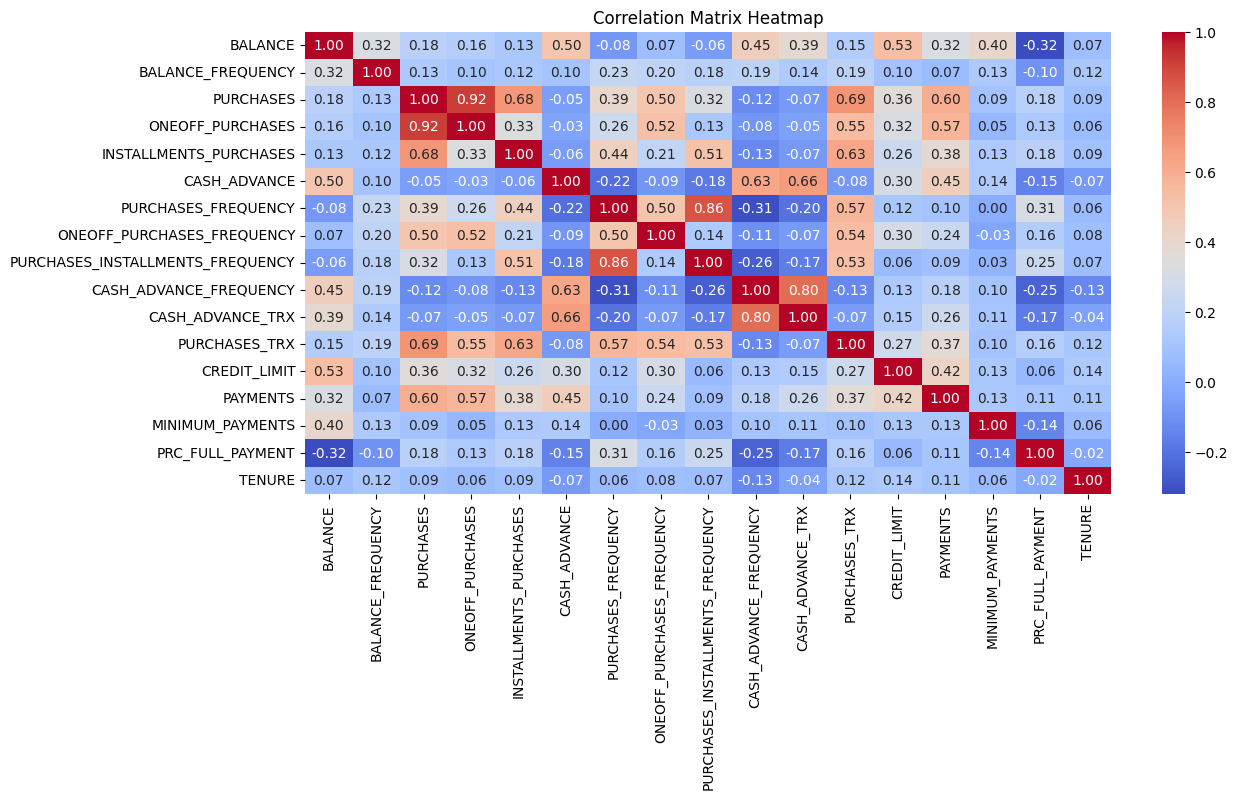

In [ ]:
corr = df.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(13, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
# plt.savefig("heatmap.png")
plt.show()

Some variables have moderate to high correlation values to other variables (>0.5 to 1).
High correlation variables are PURCHASES and ONEOFF_PURCHASES, with a 0.92 correlation value. Another example is CASH_ADVANCE_TRX with CASH_ADVANCE_FREQUENCY with a 0.8 correlation value.